In [2]:
# !apt-get update

# !apt-get install g++ openjdk-8-jdk python-dev python3-dev

# !pip3 install JPype1-py3

# !pip3 install konlpy

# !JAVA_HOME = /Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home

In [3]:
# 패키지 임포트
import re 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from konlpy.tag import Okt

In [4]:
# 데이터 불러오기 
df = pd.read_csv('./홍대_맛집_리뷰_데이터2.csv')

In [5]:
df.head(10)

,Unnamed: 0,name,average_rating,user,user_rating,comment,url,target
0,0,후계동,4.5,풀내음,5.0,NaN,https://place.map.kakao.com/1183957472,1
1,1,후계동,4.5,ㅇㅇ,5.0,❤️❤️❤️❤️❤️,https://place.map.kakao.com/1183957472,1
2,2,후계동,4.5,핑구,5.0,오래 해주세요🙏,https://place.map.kakao.com/1183957472,1
3,3,후계동,4.5,:ᴅ,3.0,웨이팅해서 먹을 맛은 아니에요… 닭보쌈은 보통이었고 비빔국수라고 해서 당연히 국물 ...,https://place.map.kakao.com/1183957472,0
4,4,후계동,4.5,Vin,5.0,와 여길 왜 이제알았죠! 너무맛있고 반찬 하나하나 다 맛있네요!! 자주 갈게요!,https://place.map.kakao.com/1183957472,1
5,5,후계동,4.5,손민영,5.0,오늘의 메뉴 너무 좋아요. 어쩜 갖가지 닭요리를 그렇게 잘하시죠?!! 이런 리뷰 잘...,https://place.map.kakao.com/1183957472,1
6,6,후계동,4.5,장슐랭가이드,1.0,여기서 밥먹고 둘다 장염걸림;;,https://place.map.kakao.com/1183957472,0
7,7,후계동,4.5,이우진,5.0,최애 식당진짜 다 맛있고 가격이 엄청 착함오늘의 메뉴라고 매일 새로운 메뉴가 준비되...,https://place.map.kakao.com/1183957472,1
8,8,후계동,4.5,정찰병,4.0,다음부터 사장님 김치볶음밥하지마세요. ㅠ ㅜ 라면만 하세요!하실꺼면 진짜 딴거말고 ...,https://place.map.kakao.com/1183957472,1
9,9,후계동,4.5,쿠집사,5.0,이렇게 맛있어도 되나 할 정도로 맛있어요ㅎㅎ,https://place.map.kakao.com/1183957472,1


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1232 non-null   int64  
 1   name            1232 non-null   object 
 2   average_rating  1232 non-null   float64
 3   user            1231 non-null   object 
 4   user_rating     1232 non-null   float64
 5   comment         960 non-null    object 
 6   url             1232 non-null   object 
 7   target          1232 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 77.1+ KB


In [7]:
df.duplicated(['comment'])

0       False
1       False
2       False
3       False
4       False
        ...  
1227    False
1228     True
1229    False
1230    False
1231    False
Length: 1232, dtype: bool

In [8]:
df.drop_duplicates(['comment'])

,Unnamed: 0,name,average_rating,user,user_rating,comment,url,target
0,0,후계동,4.5,풀내음,5.0,NaN,https://place.map.kakao.com/1183957472,1
1,1,후계동,4.5,ㅇㅇ,5.0,❤️❤️❤️❤️❤️,https://place.map.kakao.com/1183957472,1
2,2,후계동,4.5,핑구,5.0,오래 해주세요🙏,https://place.map.kakao.com/1183957472,1
3,3,후계동,4.5,:ᴅ,3.0,웨이팅해서 먹을 맛은 아니에요… 닭보쌈은 보통이었고 비빔국수라고 해서 당연히 국물 ...,https://place.map.kakao.com/1183957472,0
4,4,후계동,4.5,Vin,5.0,와 여길 왜 이제알았죠! 너무맛있고 반찬 하나하나 다 맛있네요!! 자주 갈게요!,https://place.map.kakao.com/1183957472,1
...,...,...,...,...,...,...,...,...
1226,1226,발바리네,4.6,리뷰저승사자,5.0,"6-7천원이면 매일매일 다르게 나오는 따뜻한 찌개들, 반찬들, 그리고 메인 반찬에서...",https://place.map.kakao.com/15625653,1
1227,1227,발바리네,4.6,그치,5.0,밥먹을때마다 행복합니다. 어느 반찬도 허투루가 없어요. 6000원짜리 제육볶음 상입...,https://place.map.kakao.com/15625653,1
1229,1229,발바리네,4.6,김태웅,5.0,이가격에 찌개랑 제육이 나오고 밥도 더주시는데 뭔말이 더 필요할까,https://place.map.kakao.com/15625653,1
1230,1230,발바리네,4.6,ㅇㅅㅇ,4.0,가성비짱,https://place.map.kakao.com/15625653,1


<AxesSubplot:>

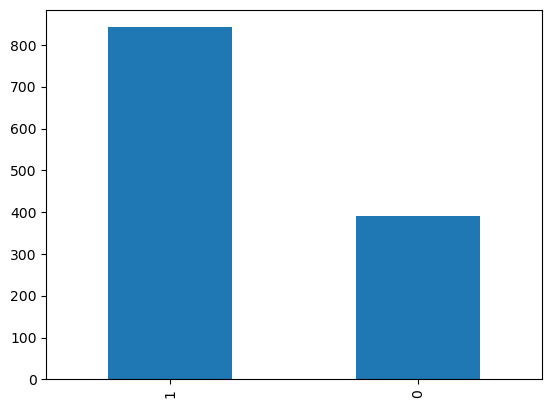

In [9]:
df['target'].value_counts().plot(kind = 'bar')

## 결측치 제거

In [10]:
df.isnull().sum()

Unnamed: 0          0
name                0
average_rating      0
user                1
user_rating         0
comment           272
url                 0
target              0
dtype: int64

In [11]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0        0
name              0
average_rating    0
user              0
user_rating       0
comment           0
url               0
target            0
dtype: int64

## 데이터 정제

In [12]:
df['comment'] = df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", '')

df.head()

/var/folders/m3/9rlp04l902592zqcywkn5ppm0000gn/T/ipykernel_48554/408186909.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment'] = df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", '')


,Unnamed: 0,name,average_rating,user,user_rating,comment,url,target
1,1,후계동,4.5,ㅇㅇ,5.0,,https://place.map.kakao.com/1183957472,1
2,2,후계동,4.5,핑구,5.0,오래 해주세요,https://place.map.kakao.com/1183957472,1
3,3,후계동,4.5,:ᴅ,3.0,웨이팅해서 먹을 맛은 아니에요 닭보쌈은 보통이었고 비빔국수라고 해서 당연히 국물 없...,https://place.map.kakao.com/1183957472,0
4,4,후계동,4.5,Vin,5.0,와 여길 왜 이제알았죠 너무맛있고 반찬 하나하나 다 맛있네요 자주 갈게요,https://place.map.kakao.com/1183957472,1
5,5,후계동,4.5,손민영,5.0,오늘의 메뉴 너무 좋아요 어쩜 갖가지 닭요리를 그렇게 잘하시죠 이런 리뷰 잘 안 남...,https://place.map.kakao.com/1183957472,1


In [13]:
df['comment'] = df['comment'].replace('', np.nan)
len(df)

959

In [14]:
df.isnull().sum()

Unnamed: 0        0
name              0
average_rating    0
user              0
user_rating       0
comment           3
url               0
target            0
dtype: int64

In [15]:
 # 정규표현식으로 인해 공백이 된 리뷰 행 제거
df = df.dropna()
len(df)

956

In [16]:
df.head()

,Unnamed: 0,name,average_rating,user,user_rating,comment,url,target
2,2,후계동,4.5,핑구,5.0,오래 해주세요,https://place.map.kakao.com/1183957472,1
3,3,후계동,4.5,:ᴅ,3.0,웨이팅해서 먹을 맛은 아니에요 닭보쌈은 보통이었고 비빔국수라고 해서 당연히 국물 없...,https://place.map.kakao.com/1183957472,0
4,4,후계동,4.5,Vin,5.0,와 여길 왜 이제알았죠 너무맛있고 반찬 하나하나 다 맛있네요 자주 갈게요,https://place.map.kakao.com/1183957472,1
5,5,후계동,4.5,손민영,5.0,오늘의 메뉴 너무 좋아요 어쩜 갖가지 닭요리를 그렇게 잘하시죠 이런 리뷰 잘 안 남...,https://place.map.kakao.com/1183957472,1
6,6,후계동,4.5,장슐랭가이드,1.0,여기서 밥먹고 둘다 장염걸림,https://place.map.kakao.com/1183957472,0


## 형태소 분석 및 백터화
---
* 단어장 생성

In [17]:
#stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [18]:
def get_morph(text):
    okt = Okt()
    pos = okt.pos(text)

    X = []
    for a1 in pos:
        X.append(f'{a1[0]}/{a1[1]}')
    return X

In [19]:
get_morph('안녕하세요 반갑습니다. 저는 김성겸입니다')

['안녕하세요/Adjective',
 '반갑습니다/Adjective',
 './Punctuation',
 '저/Noun',
 '는/Josa',
 '김성겸/Noun',
 '입니다/Adjective']

In [20]:
df = df.reset_index()

index_vectorizer = CountVectorizer(tokenizer=get_morph)
X = index_vectorizer.fit_transform(df['comment'].tolist())

In [21]:
index_vectorizer.vocabulary_

{'오래/Adverb': 3697,
 '해주세요/Verb': 5389,
 '웨이/Noun': 3846,
 '팅/Noun': 5066,
 '해서/Verb': 5374,
 '먹을/Verb': 2063,
 '맛/Noun': 1858,
 '은/Josa': 3896,
 '아니에요/Adjective': 3218,
 '닭/Noun': 1244,
 '보쌈/Noun': 2461,
 '보통/Noun': 2483,
 '이었고/Verb': 4001,
 '비빔국수/Noun': 2638,
 '라고/Josa': 1665,
 '당연히/Adjective': 1261,
 '국물/Noun': 491,
 '없을/Adjective': 3578,
 '줄/Noun': 4522,
 '알/Noun': 3379,
 '고/Josa': 377,
 '시켰는데/Verb': 3002,
 '이/Josa': 3930,
 '있어서/Adjective': 4149,
 '당황/Noun': 1267,
 '했고/Verb': 5406,
 '너무/Adverb': 992,
 '밍밍/Noun': 2249,
 '했어요/Verb': 5425,
 '와/Verb': 3748,
 '여길/Verb': 3614,
 '왜/Noun': 3776,
 '이제/Noun': 4024,
 '알았죠/Verb': 3402,
 '맛있고/Adjective': 1879,
 '반찬/Noun': 2312,
 '하나/Noun': 5203,
 '다/Adverb': 1158,
 '맛있네요/Adjective': 1885,
 '자주/Noun': 4198,
 '갈게요/Verb': 170,
 '오늘/Noun': 3693,
 '의/Josa': 3917,
 '메뉴/Noun': 2086,
 '좋아요/Adjective': 4422,
 '어쩜/Noun': 3508,
 '갖가지/Noun': 239,
 '요리/Noun': 3796,
 '를/Josa': 1708,
 '그렇게/Adverb': 571,
 '잘/VerbPrefix': 4214,
 '하시죠/Verb': 5262,
 '이런/Adjective

In [22]:
# 첫번째 행의 리뷰 이름
print(df["comment"][100])
# 첫번째 행의 긍정/부정 시그널
print(df["target"][100])
# 첫번째 행의 index_vectorizer의 (형태소, 시리얼넘버)  
print(X[100])

맛나용
1
  (0, 1858)	1
  (0, 892)	1


## TF IDF 벡터생성


In [23]:
tfidf_vectorizer = TfidfTransformer()

X = tfidf_vectorizer.fit_transform(X)
print(X[0])

  (0, 5389)	0.7252775917096398
  (0, 3697)	0.6884565454434035


In [24]:
X[0].shape

(1, 5560)

In [25]:
X.shape

(956, 5560)

## 학습/테스트 데이터 분리

In [26]:
y = df['target']

x_train, x_test , y_train, y_test  = train_test_split(X, y,test_size=0.2, stratify=y, random_state=22)

## KNN, LogisticRegression 모델
---
* Grid Search로 최적모델 찾기

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.model_selection import KFold


params = {
	"n_neighbors" : list(range(1, 11))
}

# 사용할 모델 객체 생성
model1 = KNeighborsClassifier()

# 최적의 하이퍼 파라미터를 찾는다. 
kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
grid_clf1 = GridSearchCV(model1, param_grid = params, scoring="f1", cv=kfold)
grid_clf1.fit(x_train, y_train)

# 결과 출력
print(f"최적의 하이퍼 파라미터 : {grid_clf1.best_params_}")
print(f"최적의 모델 평균 성능 : {grid_clf1.best_score_}")

최적의 하이퍼 파라미터 : {'n_neighbors': 10}
최적의 모델 평균 성능 : 0.8396076912540164


In [29]:
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()

grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='f1', cv=kfold)
grid_clf2.fit(x_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf2.best_score_}')

최적의 하이퍼 파라미터 : {'C': 10, 'penalty': 'l2'}
최적의 모델 평균 성능 : 0.852618522869118


In [30]:
# 모델 평가"
model = grid_clf2.best_estimator_
model.score(x_test, y_test)

0.796875

## 감정분석

In [31]:
def sentiment_predict(new_sentence):
    v_data = index_vectorizer.transform(new_sentence)
    X = tfidf_vectorizer.transform(v_data)
    y = model.predict(X)

    if y == 0:
        print(f'{new_sentence[0]} -> 부정')
    else :
        print(f'{new_sentence[0]} -> 긍정')

In [32]:
sentiment_predict(['음식도 맛없고 직원도 불친절해요'])
sentiment_predict(['주방장님이 엄청 친절해요'])
sentiment_predict(['서비스나 맛이 다 별로에요'])
sentiment_predict(['우리 엄마가 해준 것보다 나은듯'])
sentiment_predict(['여기 좀 심각합니다'])
sentiment_predict(['양 실화냐'])
sentiment_predict(['직원이 미친듯'])
sentiment_predict(['하.. 그냥 할말이 없음 전체적으로 왜 그 모양인지 모르겠음'])
sentiment_predict(['와 대박 부모님 모시고 싶은 맛'])
sentiment_predict(['담에 또 와야지'])
sentiment_predict(['나쁘지 않았음 다음 번에 가면 다른 메뉴 먹을 예정'])
sentiment_predict(['진짜 쓰레기'])
sentiment_predict(['개쓰레기 같은 맛 걍 장사 접어라'])

음식도 맛없고 직원도 불친절해요 -> 부정
주방장님이 엄청 친절해요 -> 긍정
서비스나 맛이 다 별로에요 -> 부정
우리 엄마가 해준 것보다 나은듯 -> 긍정
여기 좀 심각합니다 -> 긍정
양 실화냐 -> 긍정
직원이 미친듯 -> 부정
하.. 그냥 할말이 없음 전체적으로 왜 그 모양인지 모르겠음 -> 부정
와 대박 부모님 모시고 싶은 맛 -> 긍정
담에 또 와야지 -> 긍정
나쁘지 않았음 다음 번에 가면 다른 메뉴 먹을 예정 -> 긍정
진짜 쓰레기 -> 긍정
개쓰레기 같은 맛 걍 장사 접어라 -> 긍정
